IMPORT PACKAGES

In [1]:
"Import Libraries"

from urllib.request import urlopen
import json as js
from urllib.parse import urlencode
import pandas as pd
import matplotlib.pyplot as plt

DATA COLLECTION

In [2]:
source="https://data.police.uk/api/forces"  # Source of the API Documentation
source_request=urlopen(source)
force_id=source_request.read()
force_ids=js.loads(force_id)              
ids=list()
for id in force_ids:
    id=id["id"]
    ids.append(id)

source_url="https://data.police.uk/api/stops-force?"

In [3]:
age_range=list()
self_defined_ethnicity=list()
outcome_linked_to_object_of_search=list()
datetime=list()
removal_of_more_than_outer_clothing=list()
operation=list()
officer_defined_ethnicity=list()
object_of_search=list()
involved_person=list()
gender=list()
legislation=list()
location=list()
outcome=list()
type_=list()
operation_name=list()
force_ids=list()

In [4]:
for id in ids:
    params=dict()                                     
    params["force"]=id  
    params["date"]="2021-03"                            
    origin_url=urlencode(params)                   
    url=source_url+origin_url
    
    try:
        source_stop_searches=urlopen(url)
    except:
        continue 
    stop_searches=source_stop_searches.read()
    json_stop_searches=js.loads(stop_searches)         

     

    for json_stop_search in json_stop_searches:
        force_ids.append(id)
        age_range.append(json_stop_search['age_range'])
        self_defined_ethnicity.append(json_stop_search['self_defined_ethnicity'])
        outcome_linked_to_object_of_search.append(json_stop_search['outcome_linked_to_object_of_search'])
        datetime.append(json_stop_search['datetime'])
        removal_of_more_than_outer_clothing.append(json_stop_search['removal_of_more_than_outer_clothing'])
        officer_defined_ethnicity.append(json_stop_search['officer_defined_ethnicity'])
        object_of_search.append(json_stop_search['object_of_search'])
        involved_person.append(json_stop_search['involved_person'])
        gender.append(json_stop_search['gender'])
        legislation.append(json_stop_search['legislation'])
        location.append(json_stop_search['location'])
        outcome.append(json_stop_search['outcome'])
        type_.append(json_stop_search['type'])
        operation_name.append(json_stop_search['operation_name'])
        operation.append(json_stop_search['operation'])

In [5]:
"A Dictionary is created for the collected data"

collected_data={'age_range':age_range,
'self_defined_ethnicity':self_defined_ethnicity,
'outcome_linked_to_object_of_search':outcome_linked_to_object_of_search,
'datetime':datetime,
'removal_of_more_than_outer_clothing':removal_of_more_than_outer_clothing,
'operation':operation,
'officer_defined_ethnicity':officer_defined_ethnicity,
'object_of_search':object_of_search,
'involved_person':involved_person,
'gender':gender,
'legislation':legislation,
'location':location,
'outcome':outcome,
'type_':type_,
'operation_name':operation_name,
'force_ids':force_ids}

In [6]:
"Make the collected Data into a Dataframe"
df=pd.DataFrame(collected_data)
df.head(3)

,age_range,self_defined_ethnicity,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,object_of_search,involved_person,gender,legislation,location,outcome,type_,operation_name,force_ids
0,25-34,White - English/Welsh/Scottish/Northern Irish/...,None,2021-03-05T09:30:00+00:00,False,None,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.407437', 'street': {'id': 539...",Arrest,Person search,None,avon-and-somerset
1,18-24,Mixed/Multiple ethnic groups - White and Black...,True,2021-03-03T20:10:00+00:00,False,None,Mixed,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.504091', 'street': {'id': 547...",Arrest,Person search,None,avon-and-somerset
2,over 34,White - English/Welsh/Scottish/Northern Irish/...,None,2021-03-29T15:45:00+00:00,False,None,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '51.362018', 'street': {'id': 538...",A no further action disposal,Person search,None,avon-and-somerset


DATA PRE-PROCESSING

In [7]:
df.describe()

,age_range,self_defined_ethnicity,outcome_linked_to_object_of_search,datetime,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,object_of_search,involved_person,gender,legislation,location,outcome,type_,operation_name,force_ids
count,27490,29113,13596,31462,22307,13358,27237,23067,31462,27430,28967,24238,31462,31462,0,31462
unique,5,19,2,18987,2,2,5,15,2,3,10,13765,8,3,0,41
top,18-24,White - English/Welsh/Scottish/Northern Irish/...,False,2021-03-21T00:00:00+00:00,False,False,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),"{'latitude': '53.421185', 'street': {'id': 914...",A no further action disposal,Person search,NaN,merseyside
freq,9417,18677,8146,191,21587,12540,21636,14696,30225,24105,19913,66,22856,23054,NaN,5041


In [8]:
'The hour is extracted'

df['datetime']= pd.to_datetime(df['datetime'])
df['Hour']=df['datetime'].dt.hour
df.drop('datetime', axis=1, inplace=True)


'Name of Streets is extracted from the location column'

streets=list()
for i in df['location'].values:
    try:
        streets.append(i['street']['name'])
    except:
        streets.append('None')
    
df['location']=streets

In [9]:
df.shape

(31462, 16)

In [10]:
df.isnull().sum()

age_range                               3972
self_defined_ethnicity                  2349
outcome_linked_to_object_of_search     17866
removal_of_more_than_outer_clothing     9155
operation                              18104
officer_defined_ethnicity               4225
object_of_search                        8395
involved_person                            0
gender                                  4032
legislation                             2495
location                                   0
outcome                                    0
type_                                      0
operation_name                         31462
force_ids                                  0
Hour                                       0
dtype: int64

In [11]:
"The column (operation_name) is dropped, then the remaining null values are replaced with unspecified"

df.drop('operation_name', axis=1,inplace=True)
df.fillna('Unspecified',inplace=True)

In [12]:
df.head()

,age_range,self_defined_ethnicity,outcome_linked_to_object_of_search,removal_of_more_than_outer_clothing,operation,officer_defined_ethnicity,object_of_search,involved_person,gender,legislation,location,outcome,type_,force_ids,Hour
0,25-34,White - English/Welsh/Scottish/Northern Irish/...,Unspecified,False,Unspecified,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),On or near The Brambles,Arrest,Person search,avon-and-somerset,9
1,18-24,Mixed/Multiple ethnic groups - White and Black...,True,False,Unspecified,Mixed,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),On or near Roman Farm Court,Arrest,Person search,avon-and-somerset,20
2,over 34,White - English/Welsh/Scottish/Northern Irish/...,Unspecified,False,Unspecified,White,Controlled drugs,True,Male,Misuse of Drugs Act 1971 (section 23),On or near River Walk,A no further action disposal,Person search,avon-and-somerset,15
3,25-34,Unspecified,True,False,Unspecified,Unspecified,Evidence of offences under the Act,True,Male,Police and Criminal Evidence Act 1984 (section 1),On or near Crofton Avenue,Arrest,Person search,avon-and-somerset,11
4,over 34,White - English/Welsh/Scottish/Northern Irish/...,True,False,Unspecified,White,Controlled drugs,True,Female,Misuse of Drugs Act 1971 (section 23),None,A no further action disposal,Person search,avon-and-somerset,11


In [13]:
df['force_ids'].unique()

array(['avon-and-somerset', 'bedfordshire', 'cambridgeshire', 'cheshire',
       'city-of-london', 'cleveland', 'cumbria', 'derbyshire',
       'devon-and-cornwall', 'dorset', 'durham', 'dyfed-powys', 'essex',
       'gloucestershire', 'gwent', 'hampshire', 'hertfordshire',
       'humberside', 'kent', 'lancashire', 'leicestershire',
       'lincolnshire', 'merseyside', 'norfolk', 'north-wales',
       'north-yorkshire', 'northamptonshire', 'northumbria',
       'nottinghamshire', 'south-wales', 'south-yorkshire',
       'staffordshire', 'suffolk', 'surrey', 'sussex', 'thames-valley',
       'warwickshire', 'west-mercia', 'west-midlands', 'west-yorkshire',
       'wiltshire'], dtype=object)

DATA VISUALISATION

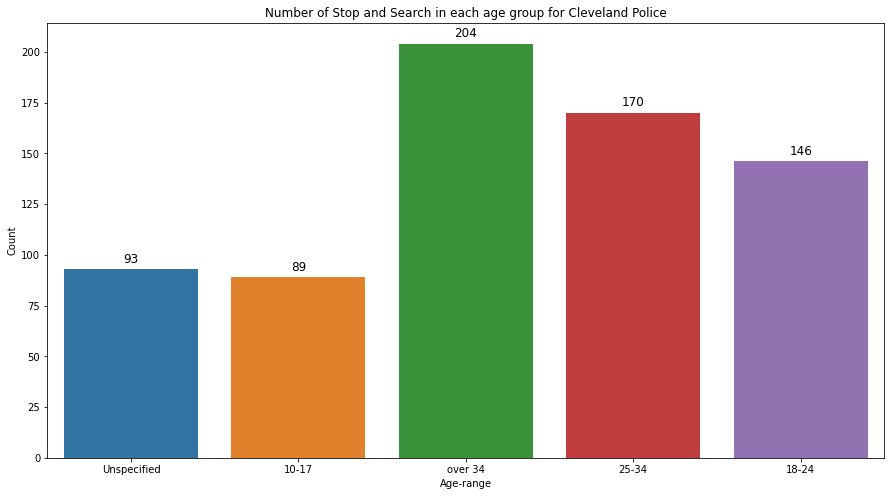

In [22]:
def plota():
    df_cleveland = df[df['force_ids'] == 'cleveland']
    fig, ax = plt.subplots(figsize=(15,8))
    import seaborn as sns
    ax = sns.countplot(x=df_cleveland['age_range'])
    ax.set_xlabel('Age-range')
    ax.set_ylabel('Count')
    ax.set_title('Number of Stop and Search in each age group for Cleveland Police')
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center',
                     va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
    
plota()    
plt.show()

Each Gender

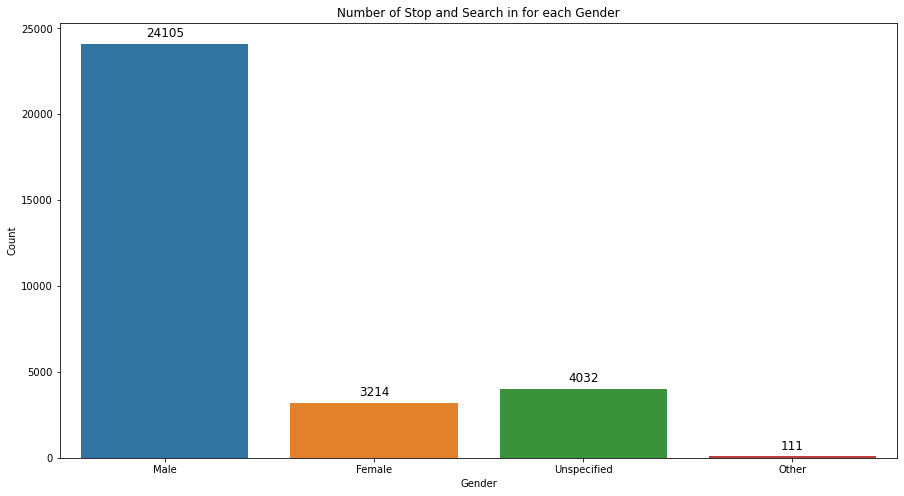

In [21]:
def plotb():
    fig, ax = plt.subplots(figsize=(15,8))
    import seaborn as sns
    ax = sns.countplot(x=df['gender'])
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
    ax.set_title('Number of Stop and Search in for each Gender')
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center',
                     va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plotb()    
plt.show()

Ethnic Group Across Cleveland Police

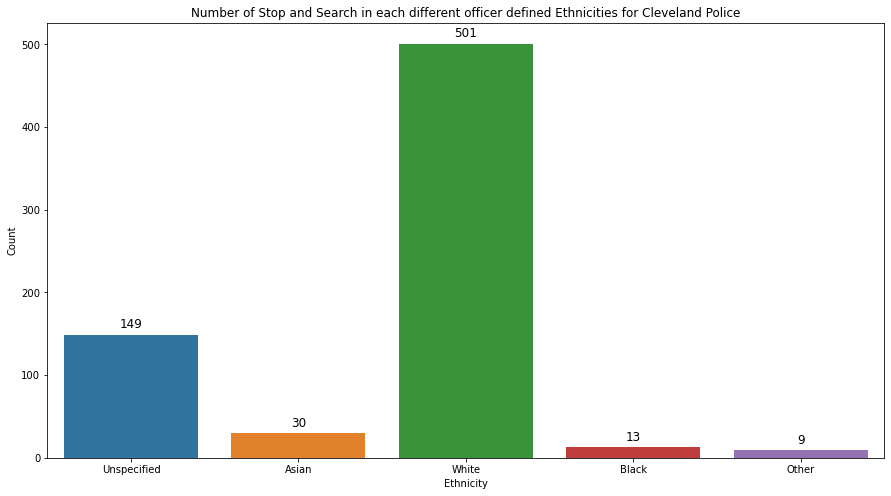

In [23]:
def plotc():
    df_cleveland = df[df['force_ids'] == 'cleveland']
    fig, ax = plt.subplots(figsize=(15,8))
    import seaborn as sns
    ax = sns.countplot(x=df_cleveland['officer_defined_ethnicity'])
    ax.set_xlabel('Ethnicity')
    ax.set_ylabel('Count')
    ax.set_title('Number of Stop and Search in each different officer defined Ethnicities for Cleveland Police')
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center',
                     va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plotc()    
plt.show()

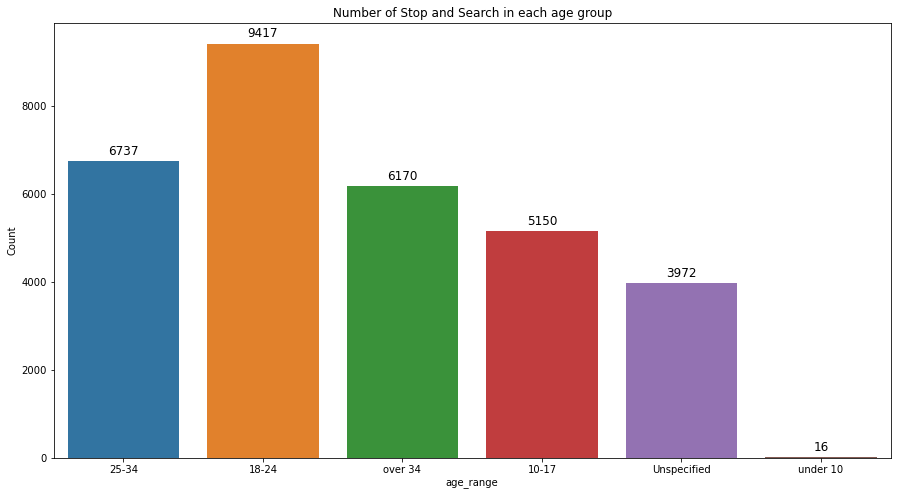

In [26]:
def plotd():
    fig, ax = plt.subplots(figsize=(15,8))
    import seaborn as sns
    ax = sns.countplot(x=df['age_range'])
    ax.set_xlabel('age_range')
    ax.set_ylabel('Count')
    ax.set_title('Number of Stop and Search in each age group')
    for i in ax.patches:
        ax.annotate(format(i.get_height()), (i.get_x() + i.get_width() / 2., i.get_height()), ha='center',
                     va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)
plotd()    
plt.show()

In [18]:
def plote():
  df['force_ids'].value_counts().to_frame().sample(frac=1).plot(kind='line', figsize=(15,8))

  plt.xlabel('Force')
  plt.ylabel('Count')
  plt.title('Line graph showing the number of stop and search by force for each force')
plote()  
plt.show()

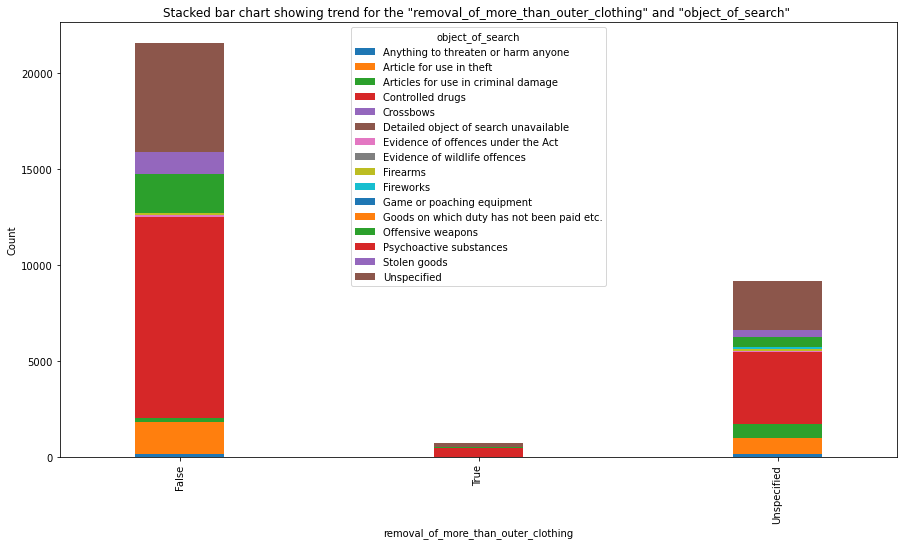

In [25]:
def plotf():
  df.groupby('removal_of_more_than_outer_clothing')['object_of_search'].value_counts().to_frame().rename(columns={'object_of_search':'count'}).\
  reset_index().pivot("removal_of_more_than_outer_clothing", 'object_of_search',	'count').plot(kind='bar', stacked=True, width=0.3, figsize=(15,8))
  plt.ylabel('Count')
  plt.title('Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and "object_of_search" ')
plotf()  
plt.show()

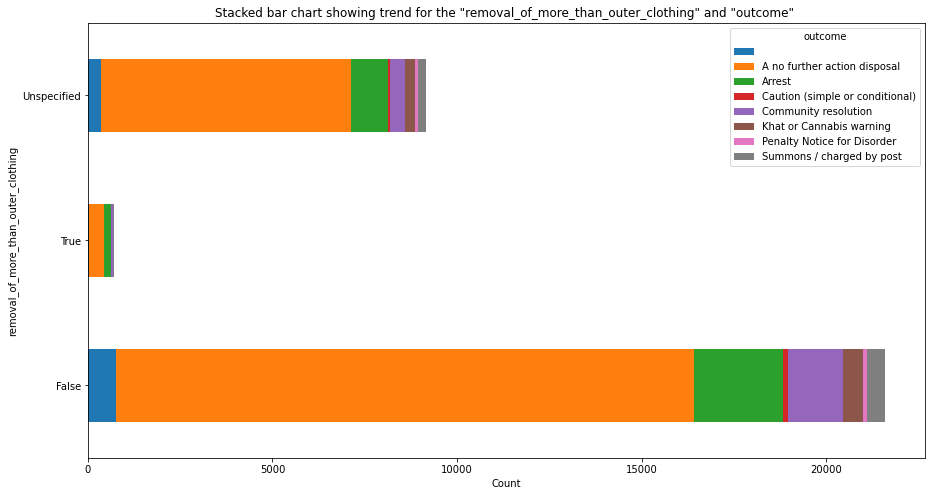

In [24]:
def plotg():
  df.groupby('removal_of_more_than_outer_clothing')['outcome'].value_counts().to_frame().rename(columns={'outcome':'count'}).\
  reset_index().pivot("removal_of_more_than_outer_clothing", 'outcome',	'count').plot(kind='barh',stacked=True, width=0.5,figsize=(15,8))

  plt.xlabel('Count')

  plt.title('Stacked bar chart showing trend for the "removal_of_more_than_outer_clothing" and "outcome" ')
  
plotg()    
plt.show()